# Module 6 - Decision Trees and Ensemble Learning

In this module we'll work about decision trees and tree-based ensemble algorithms

## Credit risk scoring project

- Dataset: https://github.com/gastonstat/CreditScoring

In [253]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt


## Data Cleaning and preparation

In [254]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [255]:
!wget $data

--2024-11-09 20:39:23--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.6’

CreditScoring.csv.6 100%[===================>] 178.21K  --.-KB/s    in 0.1s    

2024-11-09 20:39:24 (1.72 MB/s) - ‘CreditScoring.csv.6’ saved [182489/182489]



In [256]:
df = pd.read_csv('./CreditScoring.csv')

In [257]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


First lets change to lower case the column names

In [258]:
df.columns = df.columns.str.lower()

Now, if you see the actual project of Credit Scoring at https://github.com/gastonstat/CreditScoring there are some columns that currently have numerical values, but are actually encoding categorical values. These columns are:

- Status = "good", "bad"
- Home = "rent", "owner", "priv", "ignore", "parents", "other")
- Marital = "single", "married", "widow", "separated", "divorced")
- Records = "no_rec", "yes_rec")
- Job = "fixed", "partime", "freelance", "others")

So lets update our dataset with these categorical values on those columns

In [259]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [260]:
status_values = {
    1: 'ok',
    2: 'default',
    3: 'unk'
}

df.status = df.status.map(status_values)

In [261]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


Now lets do it with the rest

In [262]:
home_values = {
    1: "rent", 
    2: "owner", 
    3: "priv", 
    4: "ignore", 
    5: "parents", 
    6: "other"
}

marital_values = {
    1: "single", 
    2: "married", 
    3: "widow",
    4: "separated",
    5: "divorced"
}

records_values = { 
    1: "no_rec", 
    2: "yes_rec"
}

job_values = {
    1: "fixed", 
    2: "partime",
    3: "freelance", 
    4: "others"
}

df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records  = df.records.map(records_values)
df.job  = df.job.map(job_values)

In [263]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910


Now lets take a look at the numerical values and the interpretation of those values on the original project

In [264]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


According to the original project the items that have a value of 99999999 are NaN, so lets change that on the dataset

In [265]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999.0, value=np.nan)

In [266]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


Now lets setup our data for training, validation and testing

In [267]:
from sklearn.model_selection import train_test_split

In [268]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [269]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [270]:
y_train = (df_train['status'] == 'default').astype('int').values
y_val = (df_val['status'] == 'default').astype('int').values
y_test = (df_test['status'] == 'default').astype('int').values

In [271]:
del df_train['status']
del df_val['status']
del df_test['status']

## Decision Trees

The equivalent of a decision tree are nested if clauses checking on the different column values

In [272]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

First lets work with the cathegorical variables

In [273]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
val_dicts = df_val.fillna(0).to_dict(orient='records')

In [274]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [275]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [276]:
y_pred = dt.predict_proba(X_val)[:,1]

In [277]:
roc_auc_score(y_val, y_pred)

0.6578140644507349

The score we got is not quite good. What would hapen if we try to predict on training values and compare

In [278]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

1.0

In the case of Trees, it could mean the model is overfitting, as the result is perfect when we predict values using the training target.

To fix this we can play with the depth of the tree

In [279]:
dt = DecisionTreeClassifier(max_depth=3) # let configure a depth of 3
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print("train:", auc)

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print("val:", auc)

train: 0.7660925386129352
val: 0.763427236430611


Now we get a better result

In [280]:
from sklearn.tree import export_text

In [281]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- records=yes_rec <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 73.50
|   |   |   |--- class: 0
|   |   |--- income >  73.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- time <= 27.00
|   |   |   |--- class: 0
|   |   |--- time >  27.00
|   |   |   |--- class: 1
|--- records=yes_rec >  0.50
|   |--- seniority <= 6.50
|   |   |--- income <= 50.50
|   |   |   |--- class: 1
|   |   |--- income >  50.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 99.50
|   |   |   |--- class: 1
|   |   |--- income >  99.50
|   |   |   |--- class: 0



## Tunning the model

We are going to tune our model using two parameters:
- max_depth
- min_samples_leaf

First lets try different max_depth values to see where we can get better prediction scores

In [282]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
for d in depths:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print("%4s -> %.3f" % (d, auc))

   1 -> 0.613
   2 -> 0.688
   3 -> 0.763
   4 -> 0.779
   5 -> 0.783
   6 -> 0.772
  10 -> 0.704
  15 -> 0.669
  20 -> 0.668
None -> 0.660


For max_depths of 4 - 6 we get the best scores. Now we can combine this with different values of min_sample_leaf

In [283]:
depths = [4, 5, 6]
sample_leafs = [1, 2, 5, 10, 15, 20, 100, 200, 500]

for d in depths:
    for s in sample_leafs:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print("%4s, %3s -> %.3f" % (d, s, auc))

   4,   1 -> 0.779
   4,   2 -> 0.779
   4,   5 -> 0.779
   4,  10 -> 0.774
   4,  15 -> 0.771
   4,  20 -> 0.784
   4, 100 -> 0.767
   4, 200 -> 0.765
   4, 500 -> 0.671
   5,   1 -> 0.784
   5,   2 -> 0.783
   5,   5 -> 0.786
   5,  10 -> 0.784
   5,  15 -> 0.780
   5,  20 -> 0.785
   5, 100 -> 0.786
   5, 200 -> 0.778
   5, 500 -> 0.671
   6,   1 -> 0.775
   6,   2 -> 0.775
   6,   5 -> 0.786
   6,  10 -> 0.792
   6,  15 -> 0.795
   6,  20 -> 0.800
   6, 100 -> 0.793
   6, 200 -> 0.789
   6, 500 -> 0.671


We can identify reading the values, the best scores, but there is a much easier way to graphically identify the best combination values

In [284]:
depths = [4, 5, 6]
sample_leafs = [1, 2, 5, 10, 15, 20, 100, 200, 500]
scores = []

for d in depths:
    for s in sample_leafs:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, s, auc))

We get every score and their parameters and create a dataframe with this information

In [285]:
df_scores = pd.DataFrame(scores, columns=['depth', 'leafs', 'auc'])
df_scores.head()

,depth,leafs,auc
0,4,1,0.779339
1,4,2,0.779339
2,4,5,0.779339
3,4,10,0.773767
4,4,15,0.770702


Now we can pivot the dataframe this way

In [286]:
df_scores_pivot = df_scores.pivot(index='leafs', columns='depth', values='auc')
df_scores_pivot

depth,4,5,6
leafs,,,
1,0.779339,0.784438,0.772735
2,0.779339,0.781845,0.775430
5,0.779339,0.786311,0.787127
10,0.773767,0.783579,0.791787
15,0.770702,0.780099,0.795124
20,0.783517,0.785229,0.799043
100,0.766987,0.786425,0.793276
200,0.764929,0.777955,0.788792
500,0.671368,0.671368,0.671368


<Axes: xlabel='depth', ylabel='leafs'>

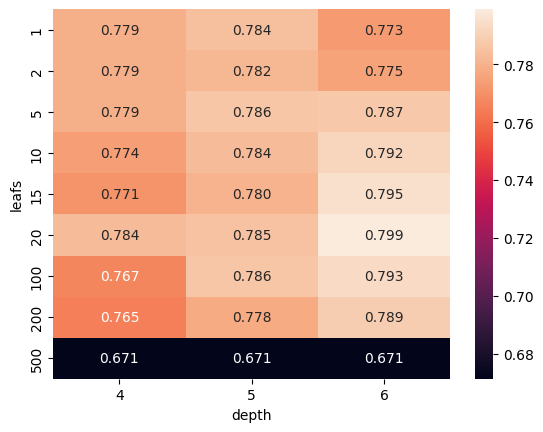

In [287]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In this case, by far the best choice is a tree with a depth of 6 and 20 node leafs, so we can set it up

In [288]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)

## Ensembles and Random Forest

- Board of experts
- Ensembling models
- Random forest - ensembling decision trees
- Tuning random forest

In [289]:
from sklearn.ensemble import RandomForestClassifier

In [290]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [291]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8039190842902879

Just by using a standard random forest classifier, which combines the results of multiple trees we got a better score than a tunned sigle tree.

Now we can try with different number of estimators

In [292]:
scores = []

for e in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=e, random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((e, auc))

In [293]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.803919
1,20,0.821459
2,30,0.820597
3,40,0.828246
4,50,0.829120
5,60,0.832980
6,70,0.833987
7,80,0.834813
8,90,0.835066
9,100,0.834000


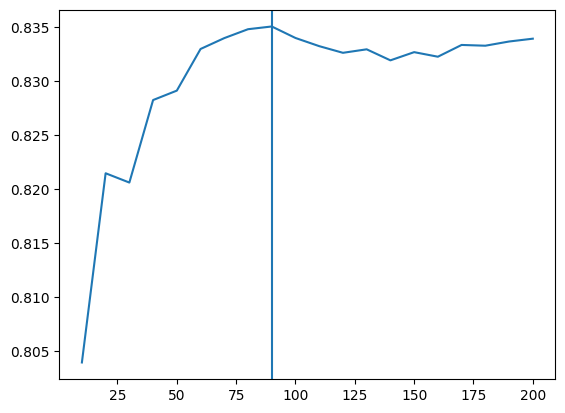

In [294]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.axvline(90, 0, 1)

As the chart shows, beyond 90 there is no much growth on the auc score.

So we can setup the number of estimators as 60 and continue tunning with the othe parameters we tried before (max_depth)

In [295]:
scores = []

for d in [5, 10, 15]:
    for e in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=e, random_state=1, max_depth=d)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, e, auc))

In [296]:
df_scores = pd.DataFrame(scores, columns=['depth', 'n_estimators', 'auc'])
df_scores.head()

,depth,n_estimators,auc
0,5,10,0.819497
1,5,20,0.824853
2,5,30,0.828070
3,5,40,0.828100
4,5,50,0.827155


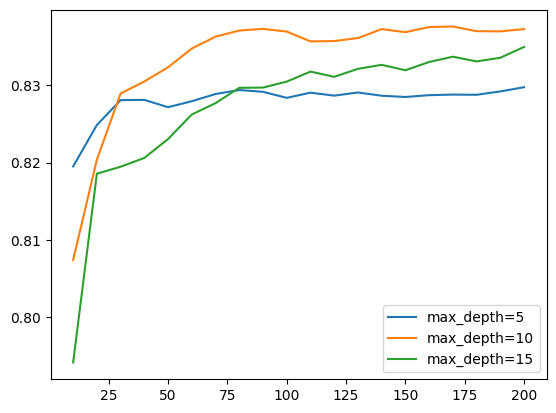

In [297]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label="max_depth=%d" % d)
plt.legend()


With this result we can fix that the best max_depth for this model is 10

In [298]:
max_depth = 10

Now that we know the best max_depth value for our model we can tune it even more using the min_sample_leaf parameter

In [299]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for e in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=e, random_state=1, max_depth=max_depth, min_samples_leaf=s)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, e, auc))

In [300]:
df_scores = pd.DataFrame(scores, columns=['leaf', 'n_estimators', 'auc'])
df_scores.head()

,leaf,n_estimators,auc
0,1,10,0.807402
1,1,20,0.820369
2,1,30,0.828929
3,1,40,0.830480
4,1,50,0.832316


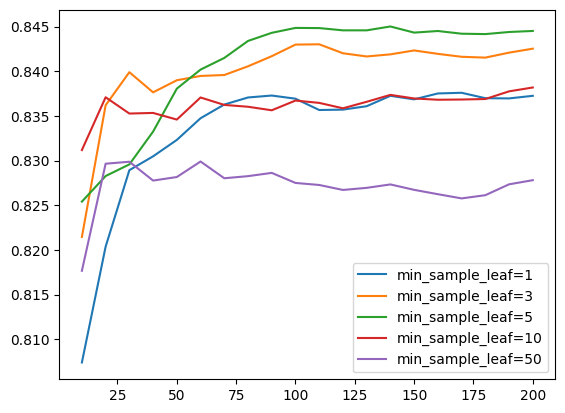

In [301]:
for s in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label="min_sample_leaf=%d" % s)
plt.legend()


Based on this results we could agree that the best tunning parameters would be:
- n_estimators=100
- min_sample_leaf=5
- max_depth=10


## Gradient boosting and XGBoost
- Gradient boosting vs random forest
- Installing XGBoost
- Training the first model
- Performance monitoring
- Parsing xgboost's monitoring output

In [302]:
!pip3 install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [303]:
import xgboost as xgb

In [304]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [305]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [306]:
y_pred = model.predict(dval)

In [307]:
roc_auc_score(y_val, y_pred)

0.8240583937996762

To monitor how the model evolves with each tree we use the evals option when setting up the model

In [308]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [309]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, 
                  verbose_eval=5, num_boost_round=200)

[0]	train-auc:0.85926	val-auc:0.80044
[5]	train-auc:0.92307	val-auc:0.81749
[10]	train-auc:0.94811	val-auc:0.82719
[15]	train-auc:0.96108	val-auc:0.82606
[20]	train-auc:0.97269	val-auc:0.82514
[25]	train-auc:0.97771	val-auc:0.82494
[30]	train-auc:0.98332	val-auc:0.82411
[35]	train-auc:0.98759	val-auc:0.82307
[40]	train-auc:0.99074	val-auc:0.82196
[45]	train-auc:0.99374	val-auc:0.82050
[50]	train-auc:0.99592	val-auc:0.82273
[55]	train-auc:0.99725	val-auc:0.82139
[60]	train-auc:0.99820	val-auc:0.82027
[65]	train-auc:0.99881	val-auc:0.82024
[70]	train-auc:0.99939	val-auc:0.81843
[75]	train-auc:0.99961	val-auc:0.81944
[80]	train-auc:0.99971	val-auc:0.81989
[85]	train-auc:0.99977	val-auc:0.81919
[90]	train-auc:0.99989	val-auc:0.81918
[95]	train-auc:0.99992	val-auc:0.81825
[100]	train-auc:0.99996	val-auc:0.81816
[105]	train-auc:0.99997	val-auc:0.81900
[110]	train-auc:0.99999	val-auc:0.81741
[115]	train-auc:1.00000	val-auc:0.81756
[120]	train-auc:1.00000	val-auc:0.81832
[125]	train-auc:1.0000

Lets try to capture this information

In [310]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, 
                  verbose_eval=5, num_boost_round=200)

In [311]:
print(output.stdout)

[0]	train-auc:0.85926	val-auc:0.80044
[5]	train-auc:0.92307	val-auc:0.81749
[10]	train-auc:0.94811	val-auc:0.82719
[15]	train-auc:0.96108	val-auc:0.82606
[20]	train-auc:0.97269	val-auc:0.82514
[25]	train-auc:0.97771	val-auc:0.82494
[30]	train-auc:0.98332	val-auc:0.82411
[35]	train-auc:0.98759	val-auc:0.82307
[40]	train-auc:0.99074	val-auc:0.82196
[45]	train-auc:0.99374	val-auc:0.82050
[50]	train-auc:0.99592	val-auc:0.82273
[55]	train-auc:0.99725	val-auc:0.82139
[60]	train-auc:0.99820	val-auc:0.82027
[65]	train-auc:0.99881	val-auc:0.82024
[70]	train-auc:0.99939	val-auc:0.81843
[75]	train-auc:0.99961	val-auc:0.81944
[80]	train-auc:0.99971	val-auc:0.81989
[85]	train-auc:0.99977	val-auc:0.81919
[90]	train-auc:0.99989	val-auc:0.81918
[95]	train-auc:0.99992	val-auc:0.81825
[100]	train-auc:0.99996	val-auc:0.81816
[105]	train-auc:0.99997	val-auc:0.81900
[110]	train-auc:0.99999	val-auc:0.81741
[115]	train-auc:1.00000	val-auc:0.81756
[120]	train-auc:1.00000	val-auc:0.81832
[125]	train-auc:1.0000

We create a function to parse the output

In [312]:
s = output.stdout

In [313]:
def parse_output(output):
    records = []
    for line in output.split("\n"):
        if len(line.split("\t"))>1:
            num_iter, train_auc, val_auc = line.split("\t")
            num_iter = int(num_iter.strip('[]'))
            train_auc = float(train_auc.split(':')[1])
            val_auc = float(val_auc.split(':')[1])
            records.append((num_iter, train_auc, val_auc))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_scores = pd.DataFrame(records, columns=columns)
    return df_scores
    

In [314]:
df_scores = parse_output(output.stdout)

In [315]:
df_scores

,num_iter,train_auc,val_auc
0,0,0.85926,0.80044
1,5,0.92307,0.81749
2,10,0.94811,0.82719
3,15,0.96108,0.82606
4,20,0.97269,0.82514
5,25,0.97771,0.82494
6,30,0.98332,0.82411
7,35,0.98759,0.82307
8,40,0.99074,0.82196
9,45,0.99374,0.82050


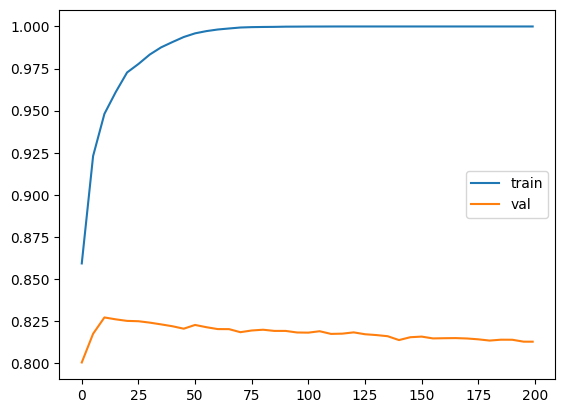

In [316]:
plt.plot(df_scores.num_iter, df_scores.train_auc, label='train')
plt.plot(df_scores.num_iter, df_scores.val_auc, label='val')
plt.legend()

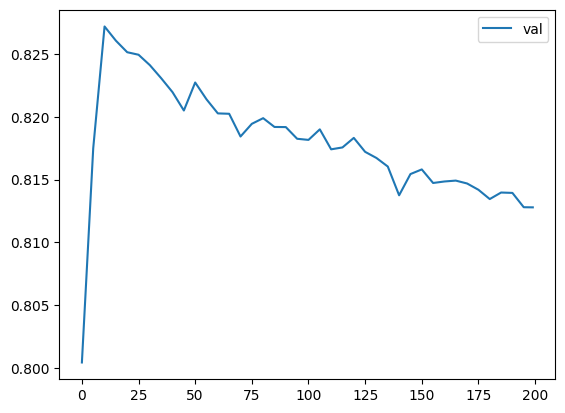

In [317]:
plt.plot(df_scores.num_iter, df_scores.val_auc, label='val')
plt.legend()

In [318]:
df_scores.describe()

,num_iter,train_auc,val_auc
count,41.000000,41.000000,41.000000
mean,99.975610,0.989895,0.817943
std,59.854193,0.026257,0.004731
min,0.000000,0.859260,0.800440
25%,50.000000,0.995920,0.814850
50%,100.000000,0.999960,0.818160
75%,150.000000,1.000000,0.820270
max,199.000000,1.000000,0.827190


In [319]:
df_scores[df_scores.val_auc == df_scores.val_auc.max()]

,num_iter,train_auc,val_auc
2,10,0.94811,0.82719


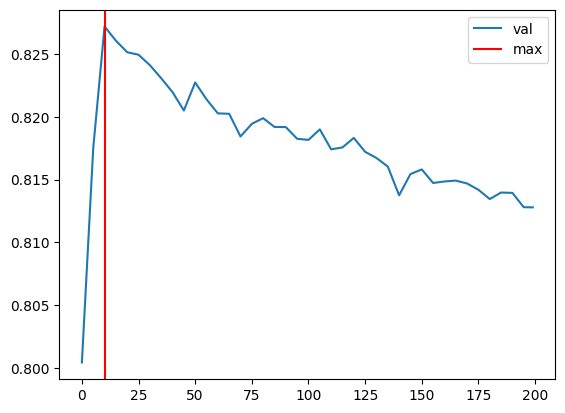

In [320]:
plt.plot(df_scores.num_iter, df_scores.val_auc, label='val')
plt.axvline(10, 0, 1, color='red', label='max')
plt.legend()

## XGBoost Parameter Tunning

We are goint to tune the XGBoost model by using three parameters:
- eta
- max_depth
- min_child_weight

In [321]:
scores = {}

In [353]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, 
                  verbose_eval=5, num_boost_round=200)

In [354]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_output(output.stdout)
key

'eta=0.1'

In [346]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.3', 'eta=1.0', 'eta=0.05', 'eta=0.5'])

In [347]:
scores['eta=0.5'].tail()

,num_iter,train_auc,val_auc
36,180,1.0,0.81049
37,185,1.0,0.81133
38,190,1.0,0.81154
39,195,1.0,0.81098
40,199,1.0,0.81038


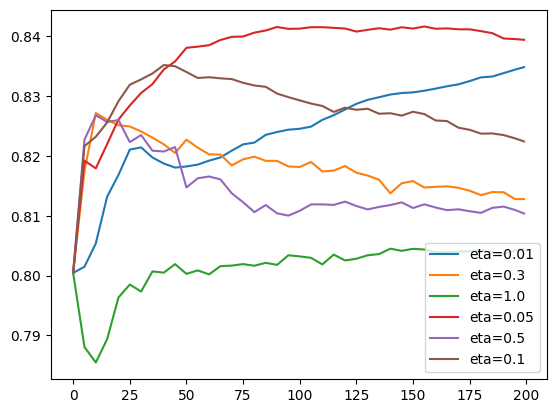

In [355]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

Based on these results, considering the combination of auc score vs how much iterations does the model needs 
to get a good score, the conclusion is that an **eta=0.1** would be the best choice

Now we can fix eta=0.1 and continue with the rest of the parameters meaning:
- max_depth
- min_child_weight (*which is equivalent to min_sample_leaf*)

In [367]:
scores = {}

We ran the following code for depths of 3, 4, 6, and 10

In [374]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, 
                  verbose_eval=5, num_boost_round=200)

In [375]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_output(output.stdout)
key

'max_depth=6'

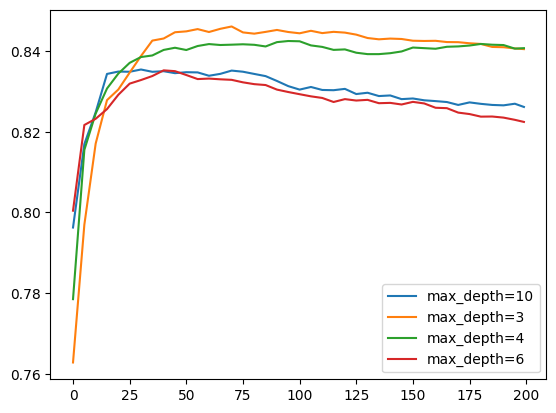

In [377]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

From this result is easy to see that the **max_depth=3** is the best value for our model

We'll finally tune the last parameter: **min_child_weight**

In [381]:
scores = {}

In [388]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, 
                  verbose_eval=5, num_boost_round=200)

In [389]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_output(output.stdout)
key

'min_child_weight=30'

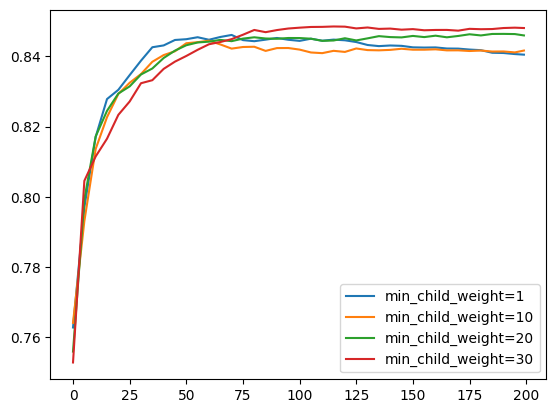

In [390]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

As the chart shows the best min_child_weight would be 30

So, our final model would be the following one

In [391]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

## Comparing the models

In this section we compare side by side the three different models we have explore so far:
- Decission Trees
- Random Forest
- XGBoost

### Decision Trees

In [392]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)

In [393]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7990426334070879

### Random Forest

In [395]:
rf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=10, min_samples_leaf=5)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8448559314701047

### XGBoost

In [396]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [399]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8479369337074623

As a result, the best model comparing between the three, is XGBoost

As final step we can train and test the model using the full train dataset

In [401]:
df_full_train = df_full_train.reset_index(drop=True)

In [405]:
y_full_train = (df_full_train.status == 'default').astype('int').values

In [406]:
del df_full_train['status']

In [410]:
full_train_dict = df_full_train.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

In [408]:
dv = DictVectorizer(sparse=False)

In [411]:
X_full_train = dv.fit_transform(full_train_dict)
X_test = dv.transform(test_dict)

In [415]:
features = list(dv.get_feature_names_out())
d_full_train = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
d_test = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [416]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, d_full_train, num_boost_round=100)

In [419]:
y_pred = model.predict(d_test)
roc_auc_score(y_test, y_pred)

0.8377520649302526